In [1]:
import sys
sys.path.append('/mnt/d/ariel2/code/core/')
sys.path.append('d:/ariel2/code/core/')
sys.path.append('/kaggle/input/my-ariel2-library')
import kaggle_support as kgs
import ariel_model
import ariel_simple
import ariel_gp
import ariel_load
import os
import numpy as np
import matplotlib.pyplot as plt
import copy
from tqdm import tqdm
kgs.debugging_mode = 1

local


In [2]:
train_data = kgs.load_all_train_data()
train_data = train_data

In [3]:
todo = dict()

# model = ariel_model.Fudger(model=ariel_gp.PredictionModel())
# model.model.run_in_parallel = True
# todo['Baseline GP'] = model

model = ariel_model.Fudger(model=ariel_gp.PredictionModel())
model.model.run_in_parallel = True
for ii in range(2):    
    model.model.starter_model.loaders[ii].apply_full_sensor_corrections.use_pca_for_background_removal = True
model.model.starter_model.loaders[1].apply_full_sensor_corrections.remove_background_n_rows = 8
model.model.starter_model.loaders[0].apply_full_sensor_corrections.remove_background_based_on_pixels = True
model.model.starter_model.loaders[1].apply_full_sensor_corrections.remove_background_based_on_rows = True
todo['New mean removal'] = model

# model = ariel_model.Fudger(model=ariel_gp.PredictionModel())
# model.model.run_in_parallel = True
# for ii in range(2):
#     model.model.starter_model.loaders[ii].apply_full_sensor_corrections.remove_background_remove_used_rows = False
#     model.model.starter_model.loaders[ii].apply_wavelength_binning = ariel_load.ApplyWavelengthBinning2()
# model.model.starter_model.loaders[0].apply_wavelength_binning.options.n_components = 4
# model.model.starter_model.loaders[1].apply_wavelength_binning.options.n_components = 3
# todo['New preprocessing'] = model

# model = ariel_model.Fudger(model=ariel_gp.PredictionModel())
# model.model.run_in_parallel = True
# for ii in range(2):
#     model.model.starter_model.loaders[ii].apply_pixel_corrections.poke_holes = True
# todo['Baseline GP, holes'] = model

# model = ariel_model.Fudger(model=ariel_gp.PredictionModel())
# model.model.run_in_parallel = True
# for ii in range(2):
#     model.model.starter_model.loaders[ii].apply_full_sensor_corrections.remove_background_remove_used_rows = False
#     model.model.starter_model.loaders[ii].apply_wavelength_binning = ariel_load.ApplyWavelengthBinning2()
# model.model.starter_model.loaders[0].apply_wavelength_binning.options.n_components = 4
# model.model.starter_model.loaders[1].apply_wavelength_binning.options.n_components = 3
# for ii in range(2):
#     model.model.starter_model.loaders[ii].apply_pixel_corrections.poke_holes = True
# todo['New preprocessing, holes'] = model

In [4]:
kgs.sanity_checks_active = False
def fname(k):
    return kgs.temp_dir + 'evaluate_model_'+k+'__'+str(len(train_data))+'.pickle'
for k,v in todo.items():
    if not os.path.isfile(fname(k)):
        print(k)
        model = copy.deepcopy(v)
        
        # Precache data
        for d in tqdm(train_data):
            copy.deepcopy(d).load_to_step(5,model.model.starter_model.loaders)
        
        
        model.train(train_data)
        inferred_data = model.infer(train_data)
        print(k)
        kgs.score_metric(inferred_data, train_data)
        kgs.dill_save(fname(k), (inferred_data,model,kgs.git_commit_id))
    else:
        print(k)
        (inferred_data,model,_) = kgs.dill_load(fname(k))
        kgs.score_metric(inferred_data, train_data)

Baseline GP


Processing in parallel: 100%|█████████████████████████████████████████████████████| 1099/1099 [1:38:40<00:00,  5.39s/it]


local
SpawnPoolWorker-2 2
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-1 1
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-3 3
CUDA_VISIBLE_DEVICES= 0
Opt time 260.7724609375
Baseline GP
Score:          0.5980
RMS error FGS:  219.70 ppm
RMS error AIRS: 160.29 ppm
New mean removal


Processing in parallel: 100%|█████████████████████████████████████████████████████| 1099/1099 [1:38:51<00:00,  5.40s/it]


local
SpawnPoolWorker-5 5
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-6 6
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-4 4
CUDA_VISIBLE_DEVICES= 0
Opt time 639.1948947906494
New mean removal
Score:          0.6022
RMS error FGS:  223.40 ppm
RMS error AIRS: 158.10 ppm


Baseline GP
[1.0024612043979069, 1.004271533840395]
[-8.768864670234591e-07, 1.5186328254460665e-05]
[1.6489488312197098, 1.4103877537410237]
Score:          0.5980
RMS error FGS:  219.70 ppm
RMS error AIRS: 160.29 ppm

20
Score:          0.6107
RMS error FGS:  126.50 ppm
RMS error AIRS: 79.29 ppm

No fudge
Score:          0.5746
RMS error FGS:  219.70 ppm
RMS error AIRS: 160.29 ppm


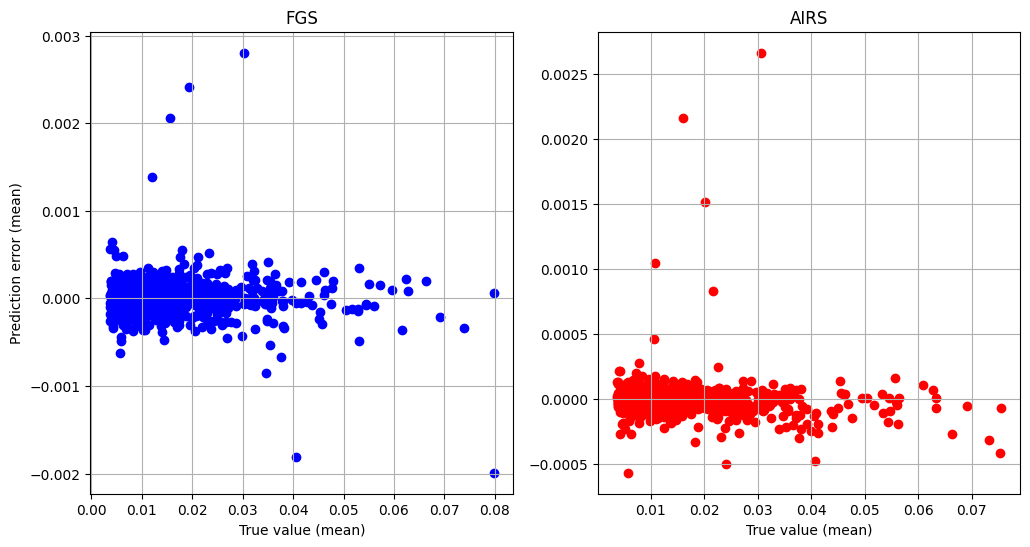

FGS
94572221, ratio:7.277, x:7.751e-05, y:-5.641e-04, RMS:5.644e-04
2554492145, ratio:6.777, x:1.542e-04, y:1.045e-03, RMS:1.058e-03
2270815333, ratio:6.431, x:7.754e-05, y:-4.987e-04, RMS:1.050e-03
3649218579, ratio:3.731, x:7.135e-04, y:2.662e-03, RMS:2.664e-03
346757988, ratio:3.720, x:1.254e-04, y:4.663e-04, RMS:4.659e-04
AIRS
94572221, ratio:12.814, x:4.402e-05, y:-5.641e-04, RMS:5.644e-04
2270815333, ratio:12.747, x:3.912e-05, y:-4.987e-04, RMS:1.050e-03
3649218579, ratio:11.007, x:2.419e-04, y:2.662e-03, RMS:2.664e-03
2554492145, ratio:10.515, x:9.937e-05, y:1.045e-03, RMS:1.058e-03
576917580, ratio:7.728, x:1.963e-04, y:1.517e-03, RMS:1.523e-03


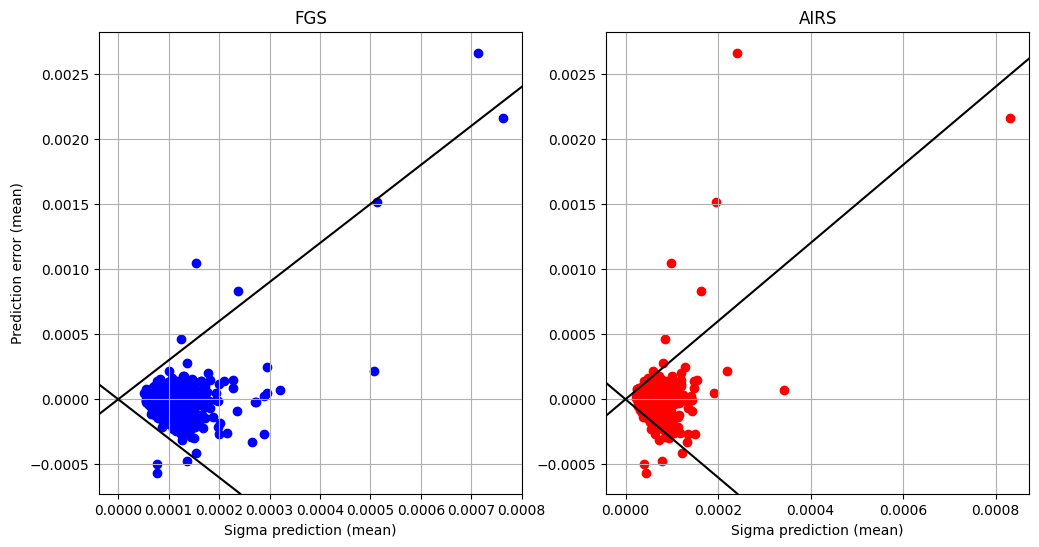

AIRS variation
1349926825, ratio:10.718, x:9.469e-05, y:1.015e-03, RMS:1.066e-03
2270815333, ratio:10.658, x:8.694e-05, y:9.266e-04, RMS:1.050e-03
3786449677, ratio:4.633, x:1.083e-04, y:5.015e-04, RMS:6.988e-04
1345089302, ratio:4.533, x:1.478e-05, y:6.701e-05, RMS:8.602e-05
926530491, ratio:4.399, x:1.593e-05, y:7.009e-05, RMS:1.126e-04


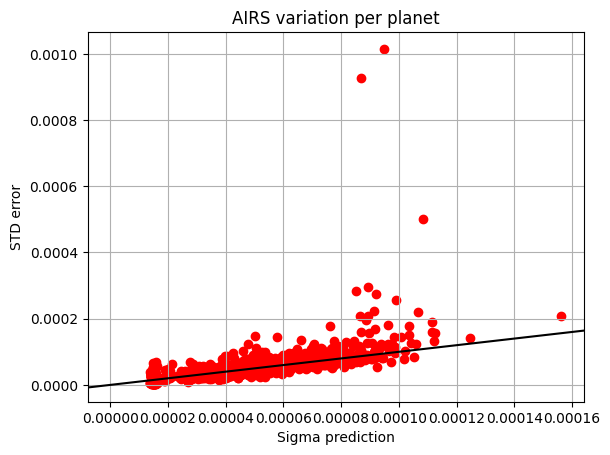

New mean removal
[1.0003720256426507, 0.9982949717600017]
[1.629153304612811e-06, 6.4742687429003015e-06]
[1.654982606712178, 1.357061042504597]
Score:          0.6022
RMS error FGS:  223.40 ppm
RMS error AIRS: 158.10 ppm

20
Score:          0.6217
RMS error FGS:  132.12 ppm
RMS error AIRS: 70.23 ppm

No fudge
Score:          0.5827
RMS error FGS:  223.40 ppm
RMS error AIRS: 158.10 ppm


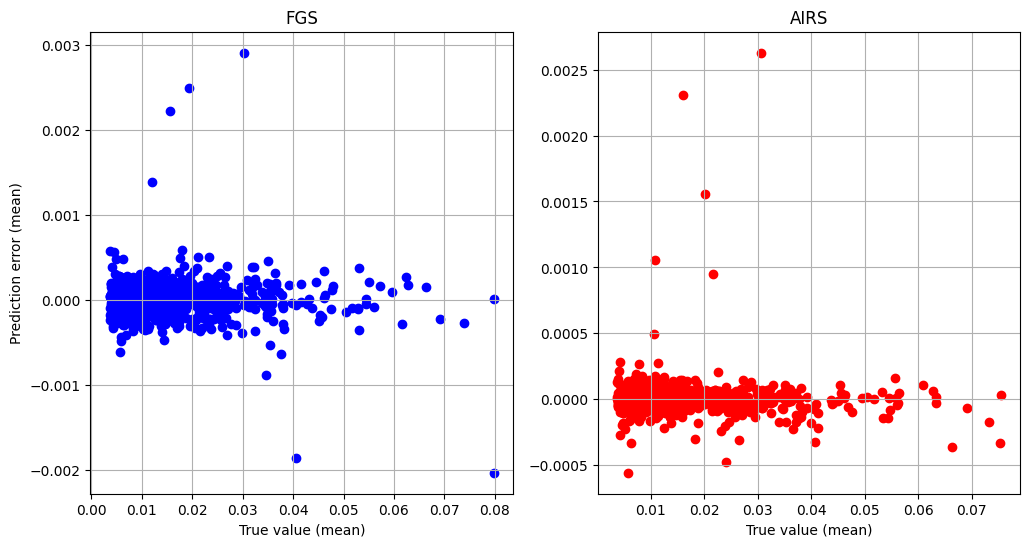

FGS
94572221, ratio:7.170, x:7.761e-05, y:-5.565e-04, RMS:5.568e-04
2554492145, ratio:6.866, x:1.542e-04, y:1.059e-03, RMS:1.071e-03
2270815333, ratio:6.148, x:7.775e-05, y:-4.780e-04, RMS:1.045e-03
2154305089, ratio:4.016, x:2.364e-04, y:9.492e-04, RMS:9.655e-04
346757988, ratio:3.925, x:1.255e-04, y:4.927e-04, RMS:4.922e-04
AIRS
94572221, ratio:12.566, x:4.428e-05, y:-5.565e-04, RMS:5.568e-04
2554492145, ratio:11.783, x:8.983e-05, y:1.059e-03, RMS:1.071e-03
2270815333, ratio:11.601, x:4.120e-05, y:-4.780e-04, RMS:1.045e-03
3649218579, ratio:10.859, x:2.420e-04, y:2.628e-03, RMS:2.630e-03
576917580, ratio:9.833, x:1.580e-04, y:1.554e-03, RMS:1.560e-03


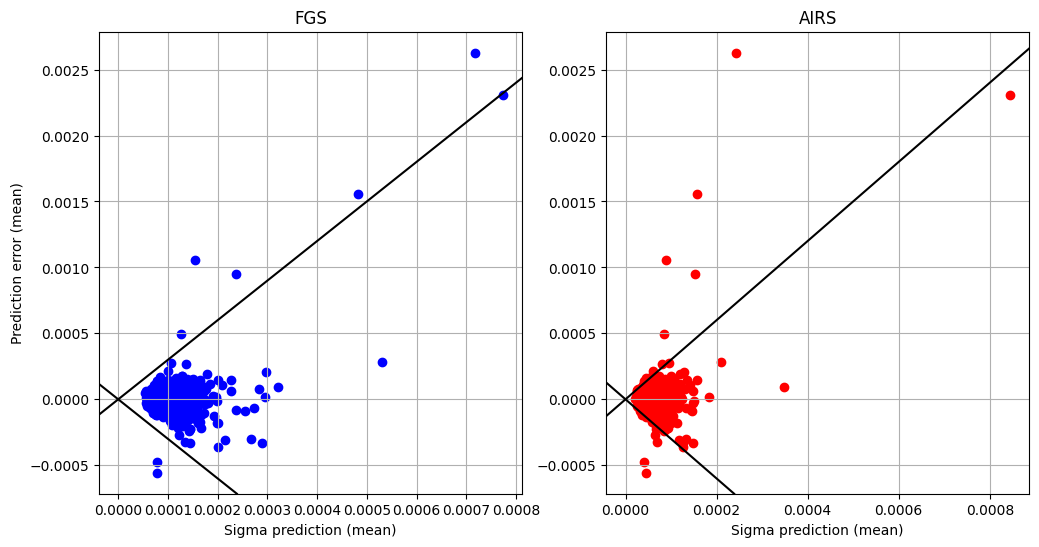

AIRS variation
2270815333, ratio:10.687, x:8.717e-05, y:9.315e-04, RMS:1.045e-03
1349926825, ratio:10.552, x:9.693e-05, y:1.023e-03, RMS:1.043e-03
2740910036, ratio:5.471, x:1.527e-05, y:8.355e-05, RMS:8.358e-05
926530491, ratio:4.407, x:1.594e-05, y:7.025e-05, RMS:9.382e-05
3786449677, ratio:4.226, x:1.043e-04, y:4.410e-04, RMS:5.592e-04


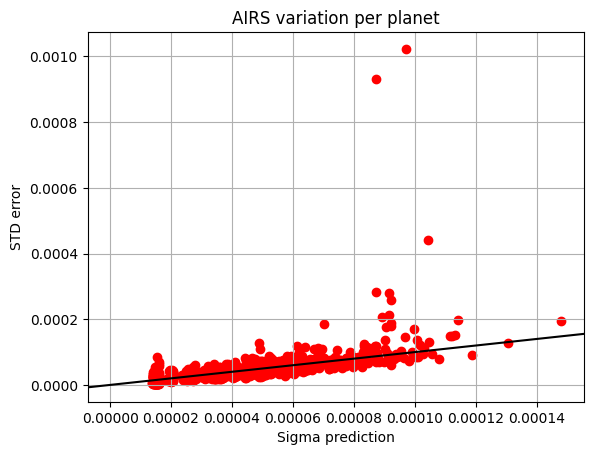

In [5]:
def basics():
    plt.grid(True)
    plt.box(True)
def plot_two_sensors(func, xl, yl, mod):
    _,ax = plt.subplots(1,2,figsize=(12,6))
    plt.sca(ax[0]);basics()
    plt.title('FGS')
    plt.xlabel(xl)
    plt.ylabel(yl)
    func(slice(0,1), 'blue', 'FGS')
    mod()
    
    plt.sca(ax[1]);basics()
    plt.title('AIRS')
    plt.xlabel(xl)
    func(slice(1,283), 'red', 'AIRS')
    mod()
    
    plt.pause(0.001)

def report_extreme_ratios(x,y,name):
    print(name)
    inds = np.argsort(np.abs(y/x))[::-1]
    for ii in inds[:5]:
        print(f'{inferred_data[ii].planet_id}, ratio:{np.abs(y[ii]/x[ii]):.3f}, x:{x[ii]:.3e}, y:{y[ii]:.3e}, RMS:{kgs.rms(error_matrix[ii,:]):.3e}')
    
    
for k,v in todo.items():
    (inferred_data,model,_) = kgs.dill_load(fname(k))
    #model.bias_a[0]+=0.006
    #model.bias_a[1]-=0.0002
    #inferred_data = model.infer(train_data)
    print(k)
    print(model.bias_a)
    print(model.bias_b)
    print(model.sigma_fudge)
    kgs.score_metric(inferred_data, train_data)
    print('')
    print('20')
    kgs.score_metric(inferred_data[:20], train_data[:20]) 
    print('')
    print('No fudge')
    model.sigma_fudge = [1,1]
    # model.bias_a = [1,1]
    # model.bias_b = [0,0]
    # print('!!!')
    inferred_data = model.infer(train_data)
    kgs.score_metric(inferred_data, train_data)     
    error_matrix = np.array([d.spectrum - t.spectrum for d,t in zip(inferred_data,train_data)])
    true_matrix = np.array([t.spectrum for d,t in zip(inferred_data,train_data)])
    
    def plot_prediction_vs_true(slic, col, name):
        x = np.mean(true_matrix[:,slic],1)
        y = np.mean(error_matrix[:,slic],1)
        plt.scatter(x,y,color = col)
        
    plot_two_sensors(plot_prediction_vs_true, 'True value (mean)', 'Prediction error (mean)', lambda:0)
    
    def plot_mean_error_vs_sigma(slic,col, name):
        x = [np.sqrt(np.sum(d.spectrum_cov[slic,slic])/(slic.stop-slic.start)**2) for d in inferred_data]
        y = np.mean(error_matrix[:,1:],1)
        plt.scatter(x,y,color = col)
        report_extreme_ratios(x,y,name)
    def mod():
        plt.axline((0,0), slope=3, color='black')
        plt.axline((0,0), slope=-3, color = 'black')        
    plot_two_sensors(plot_mean_error_vs_sigma, 'Sigma prediction (mean)', 'Prediction error (mean)', mod)
    
    plt.figure(); basics()
    plt.title('AIRS variation per planet')
    plt.xlabel('Sigma prediction')
    plt.ylabel('STD error')
    n=282
    x=np.sqrt([(np.trace(d.spectrum_cov[1:,1:]) - np.sum(d.spectrum_cov[1:,1:]) / n) / n for d in inferred_data])
    y=np.sqrt(np.var(error_matrix[:,1:],1))
    plt.scatter(x, y, color='red')
    plt.axline((0,0), slope=1, color='black')
    report_extreme_ratios(x,y,'AIRS variation')    
    plt.pause(0.001)

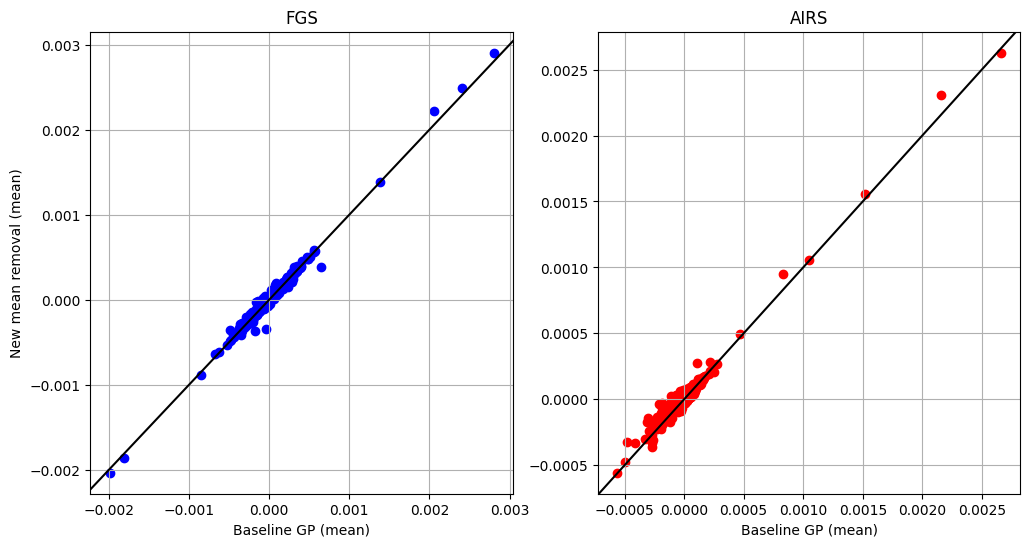

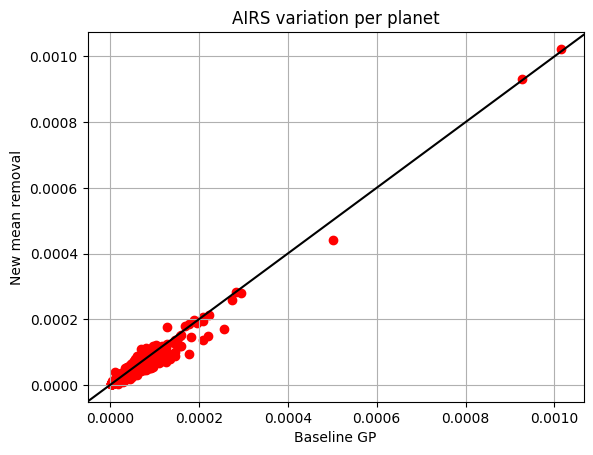

In [6]:
compare1= list(todo.keys())[0]
data1 = kgs.dill_load(fname(compare1))[0]
for k,v in todo.items():    
    compare2= k
    if compare2==compare1:
        continue    
    data2 = kgs.dill_load(fname(compare2))[0]
    error1 = np.array([d.spectrum - t.spectrum for d,t in zip(data1,train_data)])
    error2 = np.array([d.spectrum - t.spectrum for d,t in zip(data2,train_data)])
    def plot_prediction_vs_true(slic, col, name):
        x = np.mean(error1[:,slic],1)
        y = np.mean(error2[:,slic],1)
        plt.scatter(x,y,color = col)

    plot_two_sensors(plot_prediction_vs_true, compare1+' (mean)', compare2+' (mean)', lambda:plt.axline((0,0),slope=1,color='black'))

    plt.figure(); basics()
    plt.title('AIRS variation per planet')
    plt.xlabel(compare1)
    plt.ylabel(compare2)
    x=np.sqrt(np.var(error1[:,1:],1))
    y=np.sqrt(np.var(error2[:,1:],1))
    plt.scatter(x, y, color='red')
    plt.axline((0,0), slope=1, color='black')
    plt.pause(0.001)